In [28]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ExponentialLR

In [68]:
transform = transforms.ToTensor()

batch_size = 128

trainset = torchvision.datasets.MNIST(
    root="../data", train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True, num_workers=2
)

testset = torchvision.datasets.MNIST(
    root="../data", train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=False, num_workers=2
)

print("trainset:", len(trainset))
print("testset:", len(testset))


trainset: 60000
testset: 10000


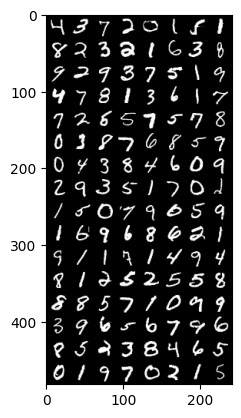

4 3 7 2 0 1 5 1 8 2 3 2 1 6 3 8 9 2 9 3 7 5 1 9 4 7 8 1 3 6 1 7 7 2 5 5 7 5 7 8 0 3 8 7 6 8 5 9 0 4 3 8 4 6 0 9 2 9 3 5 1 7 0 2 1 5 0 7 9 0 5 9 1 6 9 6 8 6 2 1 9 1 1 7 1 4 9 4 8 1 2 5 2 5 5 8 8 8 5 7 1 0 9 9 3 9 6 5 6 7 9 6 8 5 2 3 8 4 6 5 0 1 9 7 0 2 1 5


In [69]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

# print labels
print(' '.join(f'{classes[labels[j]]}' for j in range(batch_size)))

In [84]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout(0.25)

        self.conv2 = nn.Conv2d(32, 32, 3)
        self.bn2 = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.dropout2 = nn.Dropout(0.25)

        self.fc = nn.Linear(5 * 5 * 32, 10)

    def forward(self, x):
        x = self.pool1(nn.functional.relu(self.bn1(self.conv1(x))))
        x = self.dropout1(x)
        x = self.pool2(nn.functional.relu(self.bn2(self.conv2(x))))
        x = self.dropout2(x)

        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

In [85]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model = model.cuda()

In [86]:
EPOCH = 45

for epoch in range(EPOCH):
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1} completed, Loss: {running_loss / len(trainloader)}')

print('Finished Training')

Epoch 1 completed, Loss: 0.25952237755107854
Epoch 2 completed, Loss: 0.09136457865172104
Epoch 3 completed, Loss: 0.0722515439795358
Epoch 4 completed, Loss: 0.0647195261368937
Epoch 5 completed, Loss: 0.05813526352450474
Epoch 6 completed, Loss: 0.05353399505143735
Epoch 7 completed, Loss: 0.04855250486178693
Epoch 8 completed, Loss: 0.04786245754437406
Epoch 9 completed, Loss: 0.043970518162164254
Epoch 10 completed, Loss: 0.04165932917590144
Epoch 11 completed, Loss: 0.03930876425989687
Epoch 12 completed, Loss: 0.039847090236171445
Epoch 13 completed, Loss: 0.038179275144372124
Epoch 14 completed, Loss: 0.036569742349856126
Epoch 15 completed, Loss: 0.034935114233305795
Epoch 16 completed, Loss: 0.03475021714292991
Epoch 17 completed, Loss: 0.03167171686389315
Epoch 18 completed, Loss: 0.03175438274723738
Epoch 19 completed, Loss: 0.03069538398355897
Epoch 20 completed, Loss: 0.030276216773578384
Epoch 21 completed, Loss: 0.028033671257242973
Epoch 22 completed, Loss: 0.0279900130

In [87]:
model.eval()
test_loss = 0
correct = 0

with torch.no_grad():
    for data, target in testloader:
        data = data.cuda()
        output = model(data)

        target = target.cuda()

        test_loss += criterion(output, target).item()
        pred = output.argmax(dim=1)
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(testloader)
accuracy = 100. * correct / len(testloader.dataset)

print(f'Test set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(testloader.dataset)} ({accuracy:.2f}%)')

Test set: Average loss: 0.0214, Accuracy: 9931/10000 (99.31%)
